In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('nasa.csv')

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
df.shape

(4687, 40)

In [5]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

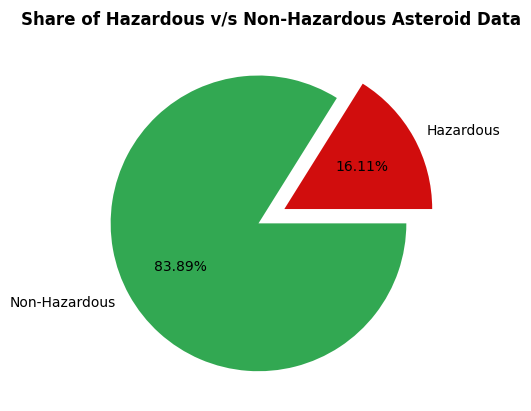

In [7]:
true_data = df['Hazardous'][df['Hazardous'] == True].count()
false_data = df['Hazardous'][df['Hazardous'] == False].count()
plt.pie([true_data,false_data],autopct='%.2f%%',
        labels=['Hazardous','Non-Hazardous'],explode=[0.1,0.1],colors=['#d10d0d','#32a852'])
plt.title('Share of Hazardous v/s Non-Hazardous Asteroid Data',fontweight='bold')
plt.savefig('pie.png',bbox_inches='tight',dpi=144)
plt.show()

In [8]:
df.drop(columns=['Neo Reference ID','Name','Orbiting Body','Orbit ID',
                 'Orbit Determination Date','Equinox'],inplace=True)

In [9]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [10]:
df.drop(columns=['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)'
                ,'Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per sec','Miss Dist.(Astronomical)'
                ,'Miss Dist.(lunar)','Miss Dist.(miles)','Miles per hour','Epoch Date Close Approach','Close Approach Date'],inplace=True)

In [11]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Relative Velocity km per hr', 'Miss Dist.(kilometers)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Est Dia in KM(max)           4687 non-null   float64
 3   Relative Velocity km per hr  4687 non-null   float64
 4   Miss Dist.(kilometers)       4687 non-null   float64
 5   Orbit Uncertainity           4687 non-null   int64  
 6   Minimum Orbit Intersection   4687 non-null   float64
 7   Jupiter Tisserand Invariant  4687 non-null   float64
 8   Epoch Osculation             4687 non-null   float64
 9   Eccentricity                 4687 non-null   float64
 10  Semi Major Axis              4687 non-null   float64
 11  Inclination                  4687 non-null   float64
 12  Asc Node Longitude           4687 non-null   float64
 13  Orbital Period    

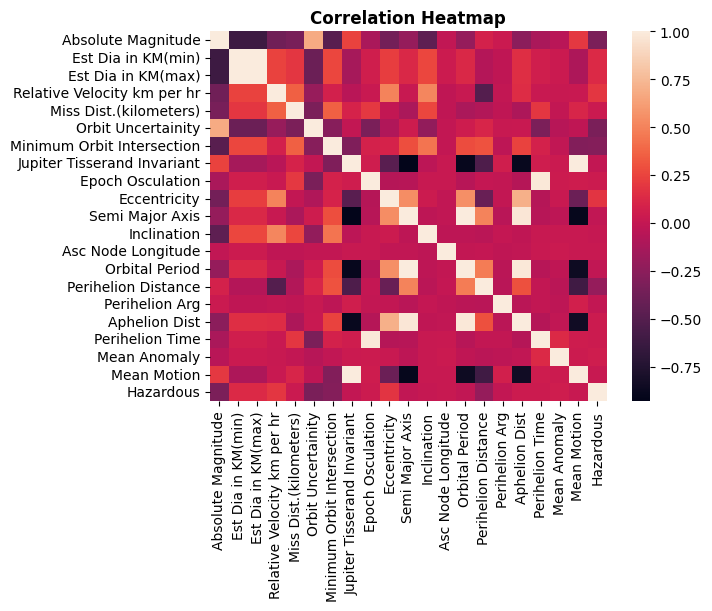

In [13]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap',fontweight='bold')
plt.savefig('Heatmap.png',dpi=144,bbox_inches='tight')
plt.show()

In [14]:
df.drop(columns=['Mean Motion','Jupiter Tisserand Invariant','Semi Major Axis','Orbital Period','Eccentricity'
                ,'Absolute Magnitude','Perihelion Distance','Orbit Uncertainity','Minimum Orbit Intersection','Inclination'
                ,'Epoch Osculation'],inplace=True)

In [15]:
df['Est Dia (Avg.)'] = (df['Est Dia in KM(max)'] + df['Est Dia in KM(min)'])/2
df.drop(columns=['Est Dia in KM(max)','Est Dia in KM(min)'],inplace=True)

In [16]:
df.insert(8,'Hazardous',df.pop('Hazardous'))

In [17]:
for j in df.columns[:-1]:
    quart_25 = df[j].quantile(0.25)
    quart_75 = df[j].quantile(0.75)
    iqr = quart_75 - quart_25
    upper_limit = quart_75 + 1.5*iqr
    lower_limit = quart_25 - 1.5*iqr
    df = df[(df[j] < upper_limit) & (df[j] > lower_limit)]

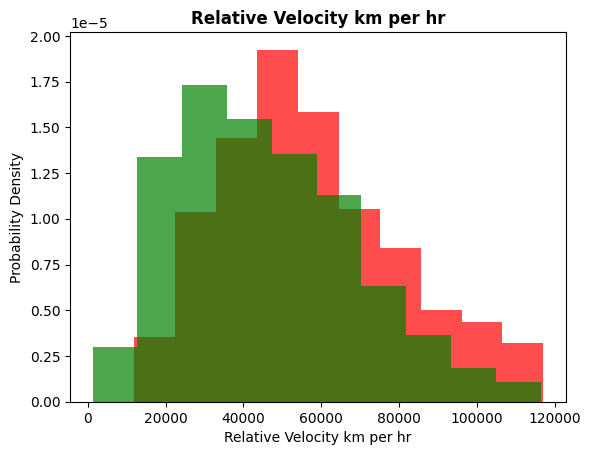

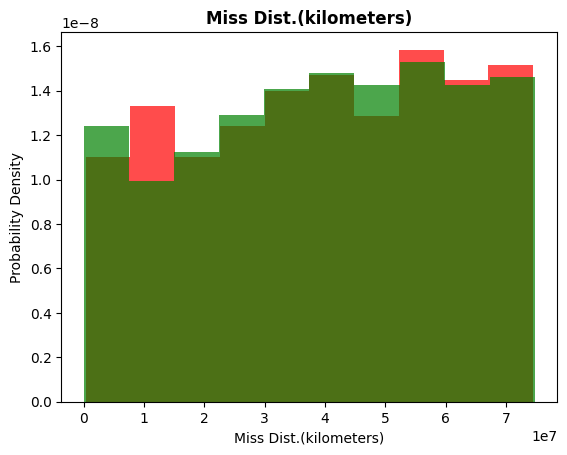

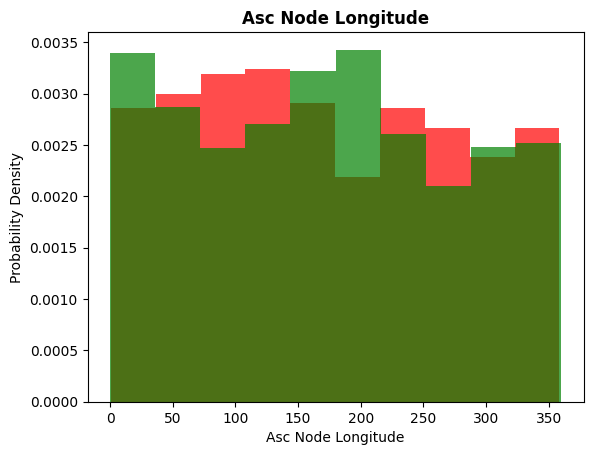

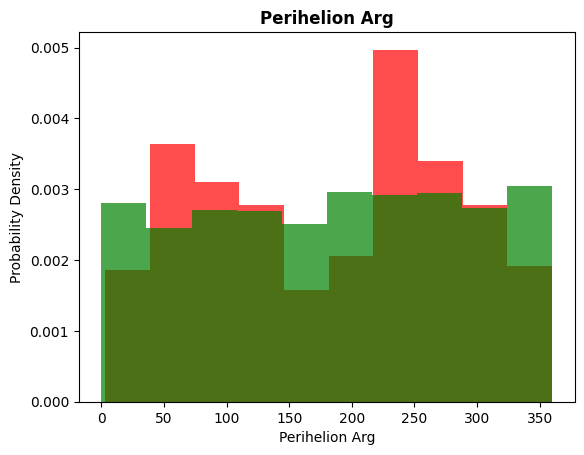

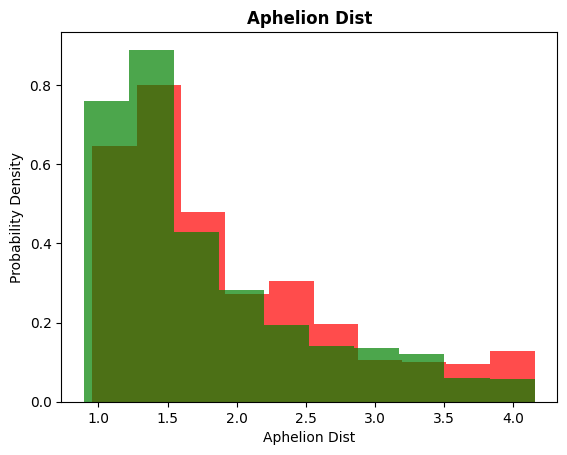

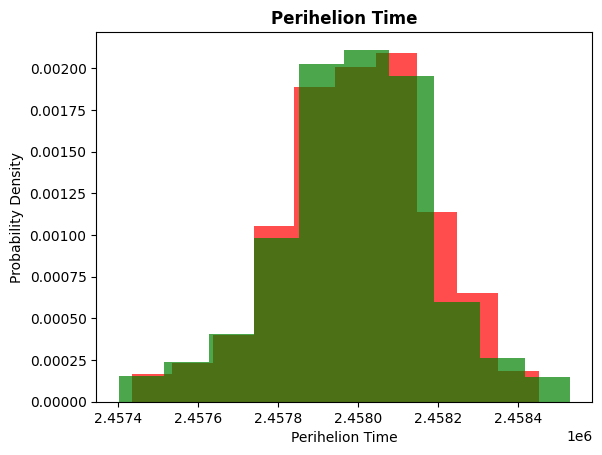

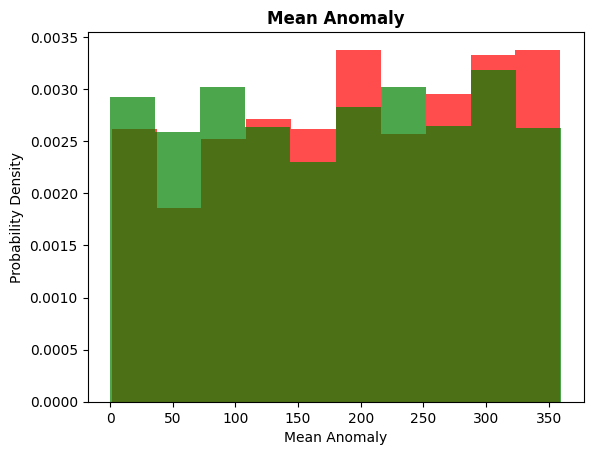

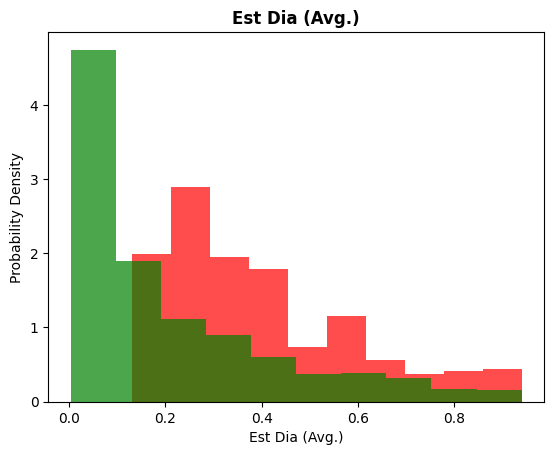

In [18]:
for i in df.columns[:-1]:
    plt.figure()
    plt.hist(df[df['Hazardous'] == 1][i],color='red',alpha=0.7,density=True,label='True')
    plt.hist(df[df['Hazardous'] == 0][i],color='green',alpha=0.7,density=True,label='False')
    plt.title(i,fontweight='bold')
    plt.xlabel(i)
    plt.ylabel('Probability Density')
    plt.show()

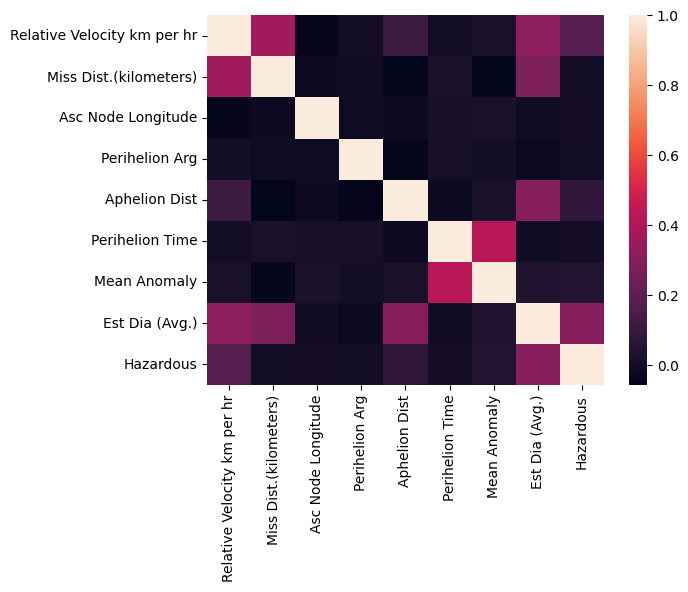

In [19]:
sns.heatmap(df.corr())
plt.show()

In [20]:
encoder=LabelEncoder()

In [21]:
df['Hazardous']=encoder.fit_transform(df['Hazardous'])

In [22]:
X = df.drop('Hazardous',axis=1)
y = df['Hazardous']

In [23]:
X

,Relative Velocity km per hr,Miss Dist.(kilometers),Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Est Dia (Avg.)
0,22017.003799,6.275369e+07,314.373913,57.257470,2.005764,2.458162e+06,264.837533,0.205846
1,65210.346095,5.729815e+07,136.717242,313.091975,1.497352,2.457795e+06,173.741112,0.236343
2,27326.560182,7.622912e+06,259.475979,248.415038,1.966857,2.458120e+06,292.893654,0.374578
3,40225.948191,4.268362e+07,57.173266,18.707701,1.527904,2.457902e+06,68.741007,0.014241
4,35426.991794,6.101082e+07,84.629307,158.263596,1.483543,2.457814e+06,135.142133,0.205846
...,...,...,...,...,...,...,...,...
4681,93657.808288,2.506718e+07,145.035928,110.720210,2.820140,2.457597e+06,178.503886,0.311561
4682,79755.354273,6.187511e+06,164.183305,276.395697,1.581299,2.457708e+06,304.306025,0.071374
4683,11610.539577,9.677324e+05,345.225230,42.111064,1.153835,2.458088e+06,282.978786,0.009852
4684,25889.910626,9.126775e+06,37.026468,274.692712,2.090708,2.458300e+06,203.501147,0.124035


In [24]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4681    0
4682    0
4683    0
4684    0
4685    0
Name: Hazardous, Length: 3701, dtype: int64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [26]:
y_train.value_counts()

Hazardous
0    2491
1     469
Name: count, dtype: int64

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
X_train_scaled

array([[ 0.82079234, -1.06459235,  0.48821641, ..., -0.00772486,
        -1.67373289,  0.04620764],
       [ 0.39998969, -0.15563082,  1.69310614, ..., -0.28200829,
        -1.1450163 , -0.00327405],
       [ 0.65531277,  1.35605831,  1.4148353 , ...,  0.79885566,
         0.06054146, -0.05052869],
       ...,
       [-1.63380048, -1.26448475,  1.5253604 , ...,  0.09895363,
         1.60531522, -0.92102584],
       [-1.26631222,  0.11344798,  0.12097021, ..., -0.8737946 ,
        -0.49624045, -0.89429085],
       [-0.39476682, -0.098606  ,  0.73123383, ...,  0.16367901,
         1.48469316,  0.5359294 ]])

In [30]:
X_test_scaled

array([[ 0.6856683 ,  0.76239049, -0.96668487, ...,  0.12268156,
         1.57282965,  0.53166994],
       [-0.66127377,  0.46581752,  0.63682346, ...,  1.30565567,
         0.01131067, -0.36805466],
       [ 0.68834221,  0.78051551, -1.58040447, ..., -0.79472668,
        -0.85181139,  0.39520543],
       ...,
       [-0.44550137, -1.65215225, -0.66494748, ...,  1.95991766,
         0.32469693,  0.03961129],
       [ 1.3422867 , -0.05558785, -0.12529865, ..., -0.49823133,
        -0.42862411, -0.05758665],
       [ 0.60876477,  0.71861526,  0.06045009, ...,  0.98220557,
         0.39323388, -0.36805466]])

In [31]:
from tensorflow import keras

2024-04-20 23:50:33.981812: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 23:50:33.982171: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 23:50:33.984646: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 23:50:34.021078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 23:50:34.707522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [32]:
nn = keras.models.Sequential([
    keras.layers.Dense(4,activation = 'relu',input_shape = (8,)),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [33]:
nn.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [34]:
history = nn.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3097 - loss: 1.2205 - val_accuracy: 0.3530 - val_loss: 1.0185
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4205 - loss: 0.9320 - val_accuracy: 0.4679 - val_loss: 0.8288
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.7736 - val_accuracy: 0.5895 - val_loss: 0.7013
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6292 - loss: 0.6471 - val_accuracy: 0.6824 - val_loss: 0.6149
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.5798 - val_accuracy: 0.7449 - val_loss: 0.5580
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7531 - loss: 0.5161 - val_accuracy: 0.7872 - val_loss: 0.5208
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.4725 - val_accuracy: 0.8142 - val_loss: 0.4940
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.4571 - val_accuracy: 0.8243 - v

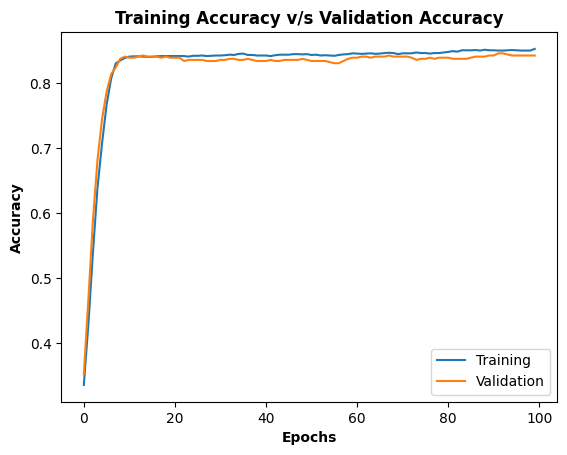

In [35]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel('Accuracy',fontweight='bold')
plt.title('Training Accuracy v/s Validation Accuracy',fontweight='bold')
plt.savefig('Accuracy.png',dpi = 144, bbox_inches='tight')
plt.legend()
plt.show()

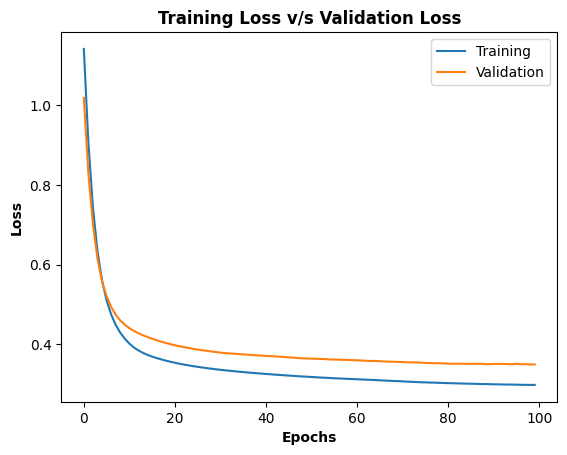

In [42]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel('Loss',fontweight='bold')
plt.title('Training Loss v/s Validation Loss',fontweight='bold')
plt.savefig('Loss.png',bbox_inches='tight',dpi=500)
plt.legend()
plt.show()

In [37]:
y_pred = nn.predict(X_test_scaled)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [38]:
y_pred = np.where(y_pred > 0.5,1,0)

In [39]:
accuracy_score(y_test,y_pred)

0.8502024291497976